# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -1.736479
b    0.251547
c    1.997161
d    0.236154
e   -1.799926
dtype: float64
a         NaN
b    0.503093
c    3.994322
d    0.472308
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-09
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00    9.286054
2020-09-12 14:45:00    9.596258
2020-09-13 14:45:00    8.780605
2020-09-14 14:45:00    8.063305
Freq: D, dtype: float64 

2020-09-11 14:45:00     9.286054
2020-09-12 14:45:00     9.596258
2020-09-13 14:45:00     8.780605
2020-09-14 14:45:00     8.063305
2020-09-15 14:45:00    10.814092
2020-09-16 14:45:00     9.854447
2020-09-17 14:45:00     9.366801
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,2.077928,0.381477,-1.900143,0.286349
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,-1.203825
2020-11-09 16:45:00,1.388746,0.847046,0.719755,-0.382662
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,1.933253
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,-0.236407
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,1.409500
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,0.258944
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,-0.141513
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,0.825903
2020-11-09 23:45:00,0.810659,1.279043,1.149819,-1.495335


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,2.077928,0.381477,-1.900143,0.286349
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,-1.203825
2020-11-09 16:45:00,1.388746,0.847046,0.719755,-0.382662
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,1.933253
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,-0.236407


In [14]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,0.258944
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,-0.141513
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,0.825903
2020-11-09 23:45:00,0.810659,1.279043,1.149819,-1.495335


In [15]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 2.07792818,  0.38147698, -1.90014332,  0.28634923],
       [ 0.52155479, -0.42133436,  0.24881677, -1.20382549],
       [ 1.3887459 ,  0.84704581,  0.71975483, -0.38266181],
       [-1.07572157, -0.13667476, -0.23058929,  1.93325344],
       [ 0.27758196,  0.89927642, -0.35920746, -0.23640705],
       [ 1.87932665,  0.80124647, -0.4499846 ,  1.40950047],
       [ 0.15648846, -1.14096778,  1.72293653,  0.25894421],
       [ 0.02947254, -0.83058054,  1.66999346, -0.14151252],
       [-0.58817412, -0.42433882, -0.42585782,  0.82590294],
       [ 0.81065885,  1.27904336,  1.14981905, -1.49533529]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.547786,0.125419,0.214554,0.125421
std,1.017202,0.827331,1.124262,1.070077
min,-1.075722,-1.140968,-1.900143,-1.495335
25%,0.061227,-0.423588,-0.409195,-0.346098
50%,0.399568,0.122401,0.009114,0.058716
75%,1.244224,0.835596,1.042303,0.691015
max,2.077928,1.279043,1.722937,1.933253


In [19]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,2.077928,0.521555,1.388746,-1.075722,0.277582,1.879327,0.156488,0.029473,-0.588174,0.810659
B,0.381477,-0.421334,0.847046,-0.136675,0.899276,0.801246,-1.140968,-0.830581,-0.424339,1.279043
C,-1.900143,0.248817,0.719755,-0.230589,-0.359207,-0.449985,1.722937,1.669993,-0.425858,1.149819
D,0.286349,-1.203825,-0.382662,1.933253,-0.236407,1.409500,0.258944,-0.141513,0.825903,-1.495335


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,0.286349,-1.900143,0.381477,2.077928
2020-11-09 15:45:00,-1.203825,0.248817,-0.421334,0.521555
2020-11-09 16:45:00,-0.382662,0.719755,0.847046,1.388746
2020-11-09 17:45:00,1.933253,-0.230589,-0.136675,-1.075722
2020-11-09 18:45:00,-0.236407,-0.359207,0.899276,0.277582
2020-11-09 19:45:00,1.409500,-0.449985,0.801246,1.879327
2020-11-09 20:45:00,0.258944,1.722937,-1.140968,0.156488
2020-11-09 21:45:00,-0.141513,1.669993,-0.830581,0.029473
2020-11-09 22:45:00,0.825903,-0.425858,-0.424339,-0.588174
2020-11-09 23:45:00,-1.495335,1.149819,1.279043,0.810659


In [21]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 14:45:00,2.077928,0.381477,-1.900143,0.286349
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,1.409500
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,0.825903
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,-0.236407
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,1.933253
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,-1.203825
2020-11-09 16:45:00,1.388746,0.847046,0.719755,-0.382662
2020-11-09 23:45:00,0.810659,1.279043,1.149819,-1.495335
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,-0.141513
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,0.258944


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    2.077928
2020-11-09 15:45:00    0.521555
2020-11-09 16:45:00    1.388746
2020-11-09 17:45:00   -1.075722
2020-11-09 18:45:00    0.277582
2020-11-09 19:45:00    1.879327
2020-11-09 20:45:00    0.156488
2020-11-09 21:45:00    0.029473
2020-11-09 22:45:00   -0.588174
2020-11-09 23:45:00    0.810659
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    2.077928
2020-11-09 15:45:00    0.521555
2020-11-09 16:45:00    1.388746
2020-11-09 17:45:00   -1.075722
2020-11-09 18:45:00    0.277582
2020-11-09 19:45:00    1.879327
2020-11-09 20:45:00    0.156488
2020-11-09 21:45:00    0.029473
2020-11-09 22:45:00   -0.588174
2020-11-09 23:45:00    0.810659
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  2.077928  0.381477 -1.900143  0.286349
2020-11-09 15:45:00  0.521555 -0.421334  0.248817 -1.203825
2020-11-09 16:45:00  1.388746  0.847046  0.719755 -0.382662
                            A         B         C         D
2020-11-09 14:45:00  2.077928  0.381477 -1.900143  0.286349
2020-11-09 15:45:00  0.521555 -0.421334  0.248817 -1.203825
2020-11-09 16:45:00  1.388746  0.847046  0.719755 -0.382662


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    2.077928
B    0.381477
C   -1.900143
D    0.286349
Name: 2020-11-09 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,2.077928,0.381477
2020-11-09 15:45:00,0.521555,-0.421334
2020-11-09 16:45:00,1.388746,0.847046
2020-11-09 17:45:00,-1.075722,-0.136675
2020-11-09 18:45:00,0.277582,0.899276
2020-11-09 19:45:00,1.879327,0.801246
2020-11-09 20:45:00,0.156488,-1.140968
2020-11-09 21:45:00,0.029473,-0.830581
2020-11-09 22:45:00,-0.588174,-0.424339
2020-11-09 23:45:00,0.810659,1.279043


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.277582,0.899276
2020-11-09 19:45:00,1.879327,0.801246
2020-11-09 20:45:00,0.156488,-1.140968


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.5215547865599571
0.5215547865599571


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -1.075722
B   -0.136675
C   -0.230589
D    1.933253
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00 -1.075722 -0.136675
2020-11-09 18:45:00  0.277582  0.899276


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.521555,0.248817
2020-11-09 16:45:00,1.388746,0.719755
2020-11-09 18:45:00,0.277582,-0.359207


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.521555 -0.421334  0.248817 -1.203825
2020-11-09 16:45:00  1.388746  0.847046  0.719755 -0.382662 

                            B         C
2020-11-09 14:45:00  0.381477 -1.900143
2020-11-09 15:45:00 -0.421334  0.248817
2020-11-09 16:45:00  0.847046  0.719755
2020-11-09 17:45:00 -0.136675 -0.230589
2020-11-09 18:45:00  0.899276 -0.359207
2020-11-09 19:45:00  0.801246 -0.449985
2020-11-09 20:45:00 -1.140968  1.722937
2020-11-09 21:45:00 -0.830581  1.669993
2020-11-09 22:45:00 -0.424339 -0.425858
2020-11-09 23:45:00  1.279043  1.149819


In [32]:
# selecting an individual element by position
print(df.iloc[1,1])
print(df.iat[1,1])


-0.4213343630944327
-0.4213343630944327


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,2.077928,0.381477,-1.900143,0.286349
2020-11-09 16:45:00,1.388746,0.847046,0.719755,-0.382662
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,-0.236407
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,1.409500
2020-11-09 23:45:00,0.810659,1.279043,1.149819,-1.495335


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,2.077928,0.381477,NaN,0.286349
2020-11-09 15:45:00,0.521555,NaN,0.248817,NaN
2020-11-09 16:45:00,1.388746,0.847046,0.719755,NaN
2020-11-09 17:45:00,NaN,NaN,NaN,1.933253
2020-11-09 18:45:00,0.277582,0.899276,NaN,NaN
2020-11-09 19:45:00,1.879327,0.801246,NaN,1.409500
2020-11-09 20:45:00,0.156488,NaN,1.722937,0.258944
2020-11-09 21:45:00,0.029473,NaN,1.669993,NaN
2020-11-09 22:45:00,NaN,NaN,NaN,0.825903
2020-11-09 23:45:00,0.810659,1.279043,1.149819,NaN


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,0,1.000000
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,5,0.5,2,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,5,1.5,6,0.999657
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,5,2.0,8,0.999391
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,5,2.5,10,0.999048
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,5,3.0,12,0.998630
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,5,4.0,16,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.381477,-1.900143,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.521555,-0.421334,-0.248817,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.388746,-0.847046,-0.719755,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.277582,-0.899276,-0.359207,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-1.879327,-0.801246,-0.449985,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.156488,-1.140968,-1.722937,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.029473,-0.830581,-1.669993,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.810659,-1.279043,-1.149819,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,1.000000
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,5,0.5,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,0.999848
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,5,1.5,0.999657
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,5,2.0,0.999391
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,5,2.5,0.999048
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,5,3.0,0.998630
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,5,3.5,0.998135
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,5,4.0,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,0,1.000000
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,5,2.5,10,0.999048
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,5,3.0,12,0.998630
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,5,4.0,16,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,0,1.000000
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,5,0.5,2,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,5,1.5,6,0.999657
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,5,2.0,8,0.999391
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,5,2.5,10,0.999048
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,5,3.0,12,0.998630
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,5,3.5,14,0.998135
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.381477,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.521555,NaN,0.248817,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4.0,0.999848
2020-11-09 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.277582,0.899276,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.879327,0.801246,NaN,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.156488,NaN,1.722937,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.029473,NaN,1.669993,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4.0,0.999848
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18.0,0.996917


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,False,True,False,False,False,False,False
2020-11-09 16:45:00,False,False,False,False,False,False,False
2020-11-09 17:45:00,True,True,True,False,False,False,False
2020-11-09 18:45:00,False,False,True,False,False,False,False
2020-11-09 19:45:00,False,False,True,False,False,False,False
2020-11-09 20:45:00,False,True,False,False,False,False,False
2020-11-09 21:45:00,False,True,False,False,False,False,False
2020-11-09 22:45:00,True,True,True,False,False,False,False
2020-11-09 23:45:00,False,False,False,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.521555,0.000000,0.248817,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.277582,0.899276,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.879327,0.801246,0.000000,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.156488,0.000000,1.722937,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.029473,0.000000,1.669993,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.000000,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.381477,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.521555,0.381477,0.248817,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.388746,0.847046,0.719755,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.277582,0.899276,0.719755,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.879327,0.801246,0.719755,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.156488,0.801246,1.722937,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.029473,0.801246,1.669993,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.029473,0.801246,1.669993,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.339993
B          0.125419
C          0.214554
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.640191
2020-11-09 15:45:00    1.264143
2020-11-09 16:45:00    1.993628
2020-11-09 17:45:00    1.722382
2020-11-09 18:45:00    2.402435
2020-11-09 19:45:00    2.961377
2020-11-09 20:45:00    3.105298
2020-11-09 21:45:00    3.481003
2020-11-09 22:45:00    3.508456
2020-11-09 23:45:00    4.533777
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,0,1.000000
2020-11-09 15:45:00,0.521555,-0.039857,-1.651327,10,0.5,2,1.999962
2020-11-09 16:45:00,1.910301,0.807188,-0.931572,15,1.5,6,2.999810
2020-11-09 17:45:00,0.834579,0.670514,-1.162161,20,3.0,12,3.999467
2020-11-09 18:45:00,1.112161,1.569790,-1.521368,25,5.0,20,4.998858
2020-11-09 19:45:00,2.991488,2.371037,-1.971353,30,7.5,30,5.997906
2020-11-09 20:45:00,3.147976,1.230069,-0.248417,35,10.5,42,6.996536
2020-11-09 21:45:00,3.177449,0.399488,1.421577,40,14.0,56,7.994670
2020-11-09 22:45:00,2.589275,-0.024851,0.995719,45,18.0,72,8.992234
2020-11-09 23:45:00,3.399933,1.254193,2.145538,50,22.5,90,9.989152


In [48]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.381477,-1.900143,5,0.0,0,1.000000
2020-11-09 15:45:00,0.521555,-0.421334,0.248817,5,0.5,2,0.999962
2020-11-09 16:45:00,1.388746,0.847046,0.719755,5,1.0,4,0.999848
2020-11-09 17:45:00,-1.075722,-0.136675,-0.230589,5,1.5,6,0.999657
2020-11-09 18:45:00,0.277582,0.899276,-0.359207,5,2.0,8,0.999391
2020-11-09 19:45:00,1.879327,0.801246,-0.449985,5,2.5,10,0.999048
2020-11-09 20:45:00,0.156488,-1.140968,1.722937,5,3.0,12,0.998630
2020-11-09 21:45:00,0.029473,-0.830581,1.669993,5,3.5,14,0.998135
2020-11-09 22:45:00,-0.588174,-0.424339,-0.425858,5,4.0,16,0.997564
2020-11-09 23:45:00,0.810659,1.279043,1.149819,5,4.5,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           2.955048
B           2.420011
C           3.623080
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.381477
2020-11-09 15:45:00    0.100220
2020-11-09 16:45:00    2.235792
2020-11-09 17:45:00   -1.212396
2020-11-09 18:45:00    1.176858
2020-11-09 19:45:00    2.680573
2020-11-09 20:45:00   -0.984479
2020-11-09 21:45:00   -0.801108
2020-11-09 22:45:00   -1.012513
2020-11-09 23:45:00    2.089702
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [61]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [63]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,19061.666667
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


In [ ]:
# the old slooow way 
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [3]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.046219,2.228421,0.782458,1.103044
1,-1.049004,1.273286,0.094498,1.179436
2,0.445465,1.126276,0.671146,-0.269442
3,-0.036258,-0.201532,-0.986122,-0.608594
4,-1.704633,-0.859252,-0.564429,-0.046756
5,-0.773180,-0.448524,-0.025335,0.661199
6,1.965724,1.460516,-1.565089,-0.236452
7,0.798919,3.253974,-0.122944,-1.418704
8,0.251609,1.964489,-0.934983,-0.300299
9,-0.575022,2.299661,1.564005,1.614092


In [4]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.046219  2.228421  0.782458  1.103044
 1 -1.049004  1.273286  0.094498  1.179436
 2  0.445465  1.126276  0.671146 -0.269442,
           0         1         2         3
 3 -0.036258 -0.201532 -0.986122 -0.608594
 4 -1.704633 -0.859252 -0.564429 -0.046756
 5 -0.773180 -0.448524 -0.025335  0.661199
 6  1.965724  1.460516 -1.565089 -0.236452,
           0         1         2         3
 7  0.798919  3.253974 -0.122944 -1.418704
 8  0.251609  1.964489 -0.934983 -0.300299
 9 -0.575022  2.299661  1.564005  1.614092]

In [5]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.046219,2.228421,0.782458,1.103044
1,-1.049004,1.273286,0.094498,1.179436
2,0.445465,1.126276,0.671146,-0.269442
3,-0.036258,-0.201532,-0.986122,-0.608594
4,-1.704633,-0.859252,-0.564429,-0.046756
5,-0.773180,-0.448524,-0.025335,0.661199
6,1.965724,1.460516,-1.565089,-0.236452
7,0.798919,3.253974,-0.122944,-1.418704
8,0.251609,1.964489,-0.934983,-0.300299
9,-0.575022,2.299661,1.564005,1.614092


In [6]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.046219,2.228421,0.782458,1.103044
1,-1.049004,1.273286,0.094498,1.179436
2,0.445465,1.126276,0.671146,-0.269442
3,-0.036258,-0.201532,-0.986122,-0.608594
4,-1.704633,-0.859252,-0.564429,-0.046756
5,-0.773180,-0.448524,-0.025335,0.661199
6,1.965724,1.460516,-1.565089,-0.236452
7,0.798919,3.253974,-0.122944,-1.418704
8,0.251609,1.964489,-0.934983,-0.300299
9,-0.575022,2.299661,1.564005,1.614092


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [7]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [8]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.377331,0.213726
1,bar,one,-1.798640,-0.564658
2,foo,two,-1.227014,-1.508105
3,bar,three,-1.433062,0.539173
4,foo,two,1.192931,1.666606
5,bar,two,-0.951919,0.122431
6,foo,one,-1.758479,-0.194913
7,foo,three,-0.787112,-1.173751


In [11]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-4.183621,0.096947
foo,-2.202343,-0.996436


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [13]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
print(tuples)
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.032502
       two      -0.322528
baz    one      -0.315744
       two       0.678680
foo    one       0.139946
       two       0.954000
qux    one       0.926180
       two      -0.494912
dtype: float64


In [14]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.798640 -0.564658
    three -1.433062  0.539173
    two   -0.951919  0.122431
foo one   -1.381148  0.018814
    three -0.787112 -1.173751
    two   -0.034083  0.158502

In [15]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.798640
            D   -0.564658
     three  C   -1.433062
            D    0.539173
     two    C   -0.951919
            D    0.122431
foo  one    C   -1.381148
            D    0.018814
     three  C   -0.787112
            D   -1.173751
     two    C   -0.034083
            D    0.158502
dtype: float64

## Plotting

Just a preview, more on the next lab class!

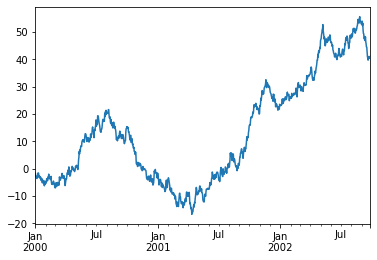

In [24]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

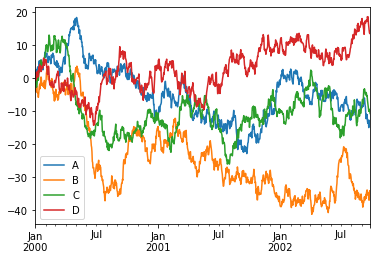

In [22]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')